##DOWNLOADING THE DATASET (Kaggle Json required)

In [46]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

!unzip hotel-reservations-classification-dataset.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
hotel-reservations-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  hotel-reservations-classification-dataset.zip
replace Hotel Reservations.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: Hotel Reservations.csv  


In [47]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


##IMPORTING AND GENERATING TWO DATASETS

In [48]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [49]:
#Dropping the ID column, has no relevance
df= df.drop(['Booking_ID'], axis = 1)

In [51]:
#randomly selecting the indexes to randomly split the dataframe into two
list_df1, list_df2= [],[]

for i in range(len(df)):
  n = random.random()
  if n>0.5:
    list_df1.append(i)
  else:
    list_df2.append(i)

print(len(df))
print(len(list_df1))
print(len(list_df2))

18130
18145


In [52]:
#splitting the dataframe into two parts 
df1 = df.iloc[list_df1].reset_index()
df2 = df.iloc[list_df2].reset_index()

##DATASET ANALYSIS

In [53]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

We want to understand the similarity between df1 and df2 (df randomly split into two parts).

The dataset is made up by variables of the following type: numerical, binary (0 or 1) and categorical. To assess the similarity between the two datasets the following tasks need to be tackled (POTENTIALLY ADD MORE): 


*   Numerical variables having similar distribution 
*   Categorical variables having similar distribution (every category have similar relative frequency)
*   Binary have simlar distribution
*   There is similar correlation among numerical 
*   There is similar correlation among categorical
*   There is similar correlation among binary 
*   There is similar correlation between numercial and categorical 



In [73]:
cat_var = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
binary_var = ['required_car_parking_space','repeated_guest']
num_var = []

for var in list(df):
  if var not in cat_var+binary_var:
    num_var.append(var)
  
print(len(list(df)))
print(len(cat_var))
print(len(num_var))
print(len(binary_var))

18
4
12
2


###DISTRIBUTION OF CATEGORICAL

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


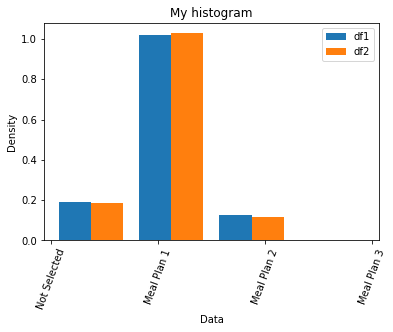

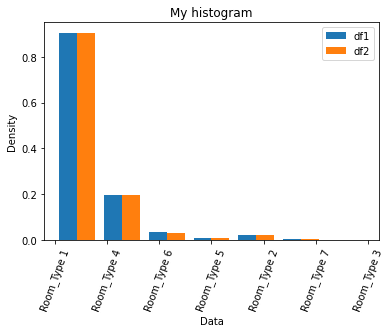

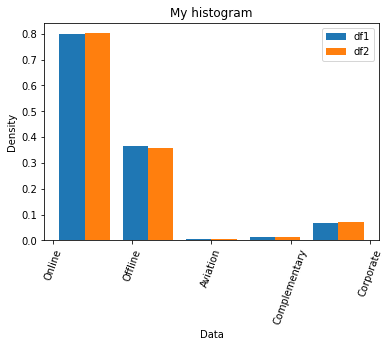

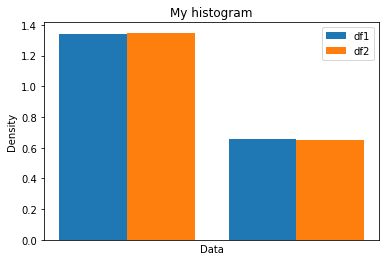

In [83]:
for cat in cat_var:
  n_bin = len(df[cat].unique())
  plt.hist([df1[cat],df2[cat]],bins =n_bin, density = True, label = ['df1','df2'])
  plt.ylabel('Density')
  plt.xlabel('Data')
  plt.xticks(rotation=70)
  plt.title('My histogram')
  plt.legend(loc='upper right')
  plt.show()

In [94]:
for cat in cat_var:
  df1_fr = df1[cat].value_counts()/len(df1)
  df2_fr = df2[cat].value_counts()/len(df2)

  df1_fr = df1_fr.to_frame().rename({cat:'df1'},axis = 1)
  df2_fr = df2_fr.to_frame().rename({cat:'df2'},axis = 1)

  freq = pd.concat([df1_fr, df2_fr], axis=1)
  freq['delta'] = abs(freq['df1'] - freq['df2'])
  print('Variable:', cat)
  print(freq,'\n')

Variable: type_of_meal_plan
                   df1       df2     delta
Meal Plan 1   0.764038  0.770626  0.006588
Not Selected  0.142747  0.140094  0.002653
Meal Plan 2   0.093105  0.089115  0.003990
Meal Plan 3   0.000110  0.000165  0.000055 

Variable: room_type_reserved
                  df1       df2     delta
Room_Type 1  0.774628  0.776302  0.001674
Room_Type 4  0.167347  0.166602  0.000745
Room_Type 6  0.027248  0.026013  0.001235
Room_Type 2  0.018478  0.019675  0.001197
Room_Type 5  0.007832  0.006779  0.001054
Room_Type 7  0.004357  0.004354  0.000004
Room_Type 3  0.000110  0.000276  0.000165 

Variable: market_segment_type
                    df1       df2     delta
Online         0.638114  0.641775  0.003661
Offline        0.293491  0.286966  0.006525
Corporate      0.053999  0.057206  0.003207
Complementary  0.010590  0.010967  0.000377
Aviation       0.003806  0.003086  0.000720 

Variable: booking_status
                   df1       df2     delta
Not_Canceled  0.669994  

When it comes to the distribution of the categorical variables there is not much that can be done analysis wise. One can look at the difference in relative frequencies and determine if these distributions are similar enough. 

Set a threshold? ex. need the delta to be < 0.001%

###DISTRIBUTION OF BINARY

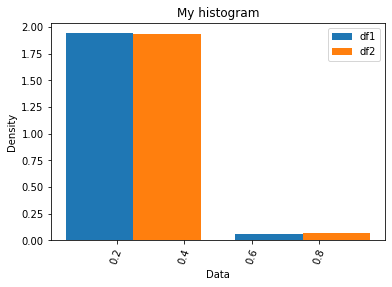

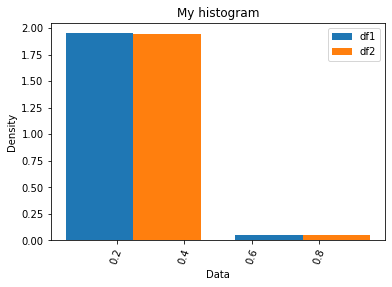

In [75]:
for bin in binary_var:
  plt.hist([df1[bin],df2[bin]], bins = 2, density = True, label = ['df1','df2'])
  #plt.hist(df1[cat],alpha = 0.5,density=True, label ='df1')
  plt.ylabel('Density')
  plt.xlabel('Data')
  plt.xticks(rotation=70)
  plt.title('My histogram')
  plt.legend(loc='upper right')
  plt.show()

In [95]:
for bin in binary_var:
  df1_fr = df1[bin].value_counts()/len(df1)
  df2_fr = df2[bin].value_counts()/len(df2)

  df1_fr = df1_fr.to_frame().rename({bin:'df1'},axis = 1)
  df2_fr = df2_fr.to_frame().rename({bin:'df2'},axis = 1)

  freq = pd.concat([df1_fr, df2_fr], axis=1)
  freq['delta'] = abs(freq['df1'] - freq['df2'])
  print('Variable:', bin)
  print(freq,'\n')

Variable: required_car_parking_space
        df1       df2     delta
0  0.970712  0.967319  0.003393
1  0.029288  0.032681  0.003393 

Variable: repeated_guest
        df1       df2     delta
0  0.975069  0.973657  0.001412
1  0.024931  0.026343  0.001412 



Same reasoning that was made on the categorical variables applies also here.